In [2]:
import sys
import os
import json

path = r"./task1out/"

list_dirs = os.walk(path) 
cnt = 0
frequent_val = {}
for root, dirs, files in list_dirs: 
    fNum = len(files)
    #Combine json files
    with open('./task1.json', 'w') as cjsf:
        for f in files: 
            cnt += 1
            sys.stdout.write("\rcurrent step: {}/{}".format(cnt,fNum))
            sys.stdout.flush()
            fp = os.path.join(root, f)
            with open(fp,'r') as jsf:
                jstr = jsf.read()
                cjsf.write(jstr+'\n')
                jdct = json.loads(jstr)
                for col in jdct['columns']:
                    for f in col['frequent_values']:
                        k = f.strip().lower()
                        if k in frequent_val:
                            frequent_val[k] += 1
                        else:
                            frequent_val[k] = 1          

current step: 1862/1862

In [4]:
sorted_lst = sorted(frequent_val.items(), key = lambda x: -x[1])
print(sorted_lst[:100])

[('none', 12377), ('1', 4337), ('0', 4091), ('2', 3247), ('3', 2801), ('4', 2263), ('s', 2219), ('6', 1979), ('7', 1575), ('0.0', 1472), ('5', 1436), ('8', 1211), ('10', 1190), ('*', 1166), ('9', 974), ('11', 704), ('no data', 700), ('brooklyn', 684), ('bronx', 641), ('12', 603), ('n/a', 561), ('queens', 558), ('r', 520), ('manhattan', 515), ('', 503), ('0 hrs', 502), ('20', 483), ('1-10 hrs', 466), ('15', 428), ('staten island', 416), ('16', 404), ('11-20 hrs', 363), ('yes', 351), ('13', 347), ('14', 330), ('17', 305), ('50', 304), ('25', 303), ('no', 300), ('1.0', 285), ('n', 280), ('30', 278), ('.', 273), ('y', 270), ('21-30 hrs', 256), ('31', 255), ('18', 250), ('100', 250), ('24', 248), ('0.5', 245), ('na', 241), ('21', 213), ('new york', 210), ('22', 209), ('d', 209), ('40', 207), ('33', 206), ('50.0', 205), ('27', 203), ('-', 202), ('33.3', 202), ('19', 198), ('26', 196), ('a', 193), ('p', 188), ('28', 176), ('23', 175), ('ny', 171), ('broadway', 167), ('2010', 165), ('2009', 16

In [5]:
# Get rids of pure numbers
import re
all_lst = []
numPat = r'[0-9]{1,3}\.?[0-9]{0,3}'
for it in sorted_lst:
    mat = it[0].lower()
    if re.match(numPat, mat):
        continue
    if len(it[0]) == 1:
        continue
    all_lst.append(it)
print(all_lst[:100])

[('none', 12377), ('no data', 700), ('brooklyn', 684), ('bronx', 641), ('n/a', 561), ('queens', 558), ('manhattan', 515), ('', 503), ('staten island', 416), ('yes', 351), ('no', 300), ('na', 241), ('new york', 210), ('ny', 171), ('broadway', 167), ('wd', 133), ('all students', 132), ('null', 120), ('n/a - zoned program', 113), ('proficient', 109), ('high school', 109), ('other', 108), ('p.s. 212', 102), ('well developed', 100), ('- 0', 99), ('p.s. 253', 98), ('audition', 98), ('elementary', 97), ('true', 96), ('k-8', 95), ('meeting target', 94), ('approaching target', 94), ('exceeding target', 94), ('d1-elevator', 93), ('false', 93), ('then to new york city residents', 92), ('upf', 85), ('developing', 83), ('unspecified', 81), ('nj', 77), ('junior high-intermediate-middle', 76), ('p.s. 015 roberto clemente', 75), ('midtown-midtown south', 72), ('not available', 72), ('english', 70), ('secondary school', 70), ('p.s. 360', 69), ('black', 69), ('c1-walk-up', 69), ('d7-elevator', 68), ('sc

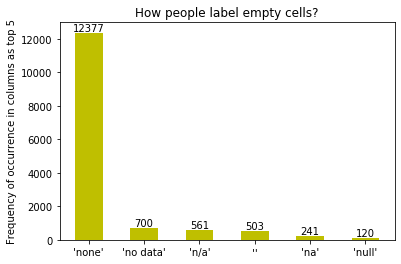

In [90]:
#how people label empty cells
import matplotlib.pyplot as plt
import numpy as np
empty_words_lst = ['none', 'n/a', 'na', '-', 'no data', 'null', '']
empty_lst = []
cells_lst = []
for it in all_lst:
    mat = it[0].strip().lower()
    if mat in empty_words_lst:
        empty_lst.append(it)
    else:
        s = it[0].strip()
        cells_lst.append((s,it[1]))
eLabel = []
eLst = []
for it in empty_lst:
    eLabel.append("'"+it[0]+"'")
    eLst.append(it[1])
plt.bar(range(len(eLst)), eLst, tick_label = eLabel, width = 0.5, color = 'y')
plt.ylabel('Frequency of occurrence in columns as top 5')
plt.title('How people label empty cells?')
for a,b in zip(range(len(eLst)), eLst):
    plt.text(a, b, '%d' % b,ha='center', va= 'bottom',fontsize=10)
plt.savefig("./Empty_labels.png")
plt.show()

In [46]:
print(cells_lst[:100])

[('brooklyn', 684), ('bronx', 641), ('queens', 558), ('manhattan', 515), ('staten island', 416), ('yes', 351), ('no', 300), ('new york', 210), ('ny', 171), ('broadway', 167), ('wd', 133), ('all students', 132), ('n/a - zoned program', 113), ('proficient', 109), ('high school', 109), ('other', 108), ('p.s. 212', 102), ('well developed', 100), ('- 0', 99), ('p.s. 253', 98), ('audition', 98), ('elementary', 97), ('true', 96), ('k-8', 95), ('meeting target', 94), ('approaching target', 94), ('exceeding target', 94), ('d1-elevator', 93), ('false', 93), ('then to new york city residents', 92), ('upf', 85), ('developing', 83), ('unspecified', 81), ('nj', 77), ('junior high-intermediate-middle', 76), ('p.s. 015 roberto clemente', 75), ('midtown-midtown south', 72), ('not available', 72), ('english', 70), ('secondary school', 70), ('p.s. 360', 69), ('black', 69), ('c1-walk-up', 69), ('d7-elevator', 68), ('science', 66), ('hudson yards-chelsea-flatiron-union square', 65), ('not meeting target', 

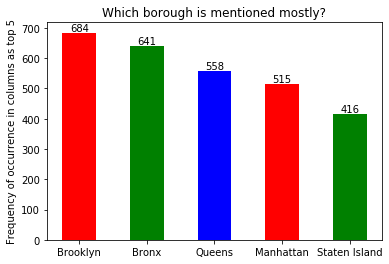

In [91]:
#Boroughs
boroghLst = ['Brooklyn', 'Bronx', 'Queens', 'Manhattan', 'Staten Island']
boroghs = []
for it in cells_lst:
    if it[0] in [x.lower() for x in boroghLst]:
        boroghs.append(it[1])
plt.bar(range(len(boroghLst)), boroghs, tick_label = boroghLst, width = 0.5, color = 'rgb')
plt.ylabel('Frequency of occurrence in columns as top 5')
plt.title('Which borough is mentioned mostly?')
for a,b in zip(range(len(boroghLst)), boroghs):
    plt.text(a, b, '%d' % b,ha='center', va= 'bottom',fontsize=10)
plt.savefig("./Boroughs.png")
plt.show()

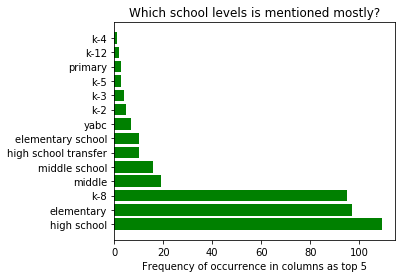

In [94]:
#Education
schoollevel_list = ['k-1', 'k-2', 'k-3', 'k-4','k-5','k-6','k-7','k-8','k-9','k-10','k-11','k-12',\
    'elementary', 'elementary school', 'primary', 'primary school', 'high school', 'middle', 'middle school', 'high school transfer', 'yabc', \
        'senior high school', 'college']
eduLabel = []
eduLst = []
for it in cells_lst:
    if it[0] in schoollevel_list:
        eduLabel.append(it[0])
        eduLst.append(it[1])
plt.barh(eduLabel, eduLst,color = 'green')
plt.xlabel('Frequency of occurrence in columns as top 5')
plt.title('Which school levels is mentioned mostly?')
plt.subplots_adjust(left=0.25)
plt.savefig("./School_levels.png")
plt.show()

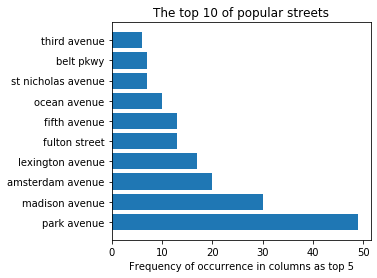

In [88]:
#street name
streetPat = \
r"([a-zA-Z0-9]{1,10} ){1,5}(place|avenue|ave|ave\.|court|ct|street|st|drive|dr|lane|ln|road|rd|blvd|plaza|parkway|pkwy)$"
streetLst = []
cnt = 0
for it in cells_lst:
    if re.match(streetPat, it[0]):
        streetLst.append((it[0], it[1]))
popularStreet = streetLst[:10]
stLabel = []
stLst = []
for it in popularStreet:
    stLabel.append(it[0])
    stLst.append(it[1])
plt.barh(stLabel, stLst)
plt.subplots_adjust(left=0.)
plt.xlabel('Frequency of occurrence in columns as top 5')
plt.title('The top 10 of popular streets')
plt.savefig("./Popular_street.png")
plt.show()